In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['patch.force_edgecolor']=True

In [2]:
Data = pd.read_csv(r"C:\Users\Manoj Shiwale\Desktop\All Files\VERZEO-ML\spam.csv",engine='python')
Data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
Data=Data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
Data.rename(columns={'v1':'Category','v2':'Message'},inplace=True)

In [4]:
Data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
print('No. of Samples: {}'.format(Data.index.max()))
print('No. of nulls:\n{}'.format(Data.isnull().sum()))


No. of Samples: 5571
No. of nulls:
Category    0
Message     0
dtype: int64


In [6]:
Data['Msg_Length']=Data['Message'].apply(lambda X:len(X))


In [7]:
Data.head()


,Category,Message,Msg_Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
Data['Category'].value_counts()


ham     4825
spam     747
Name: Category, dtype: int64

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

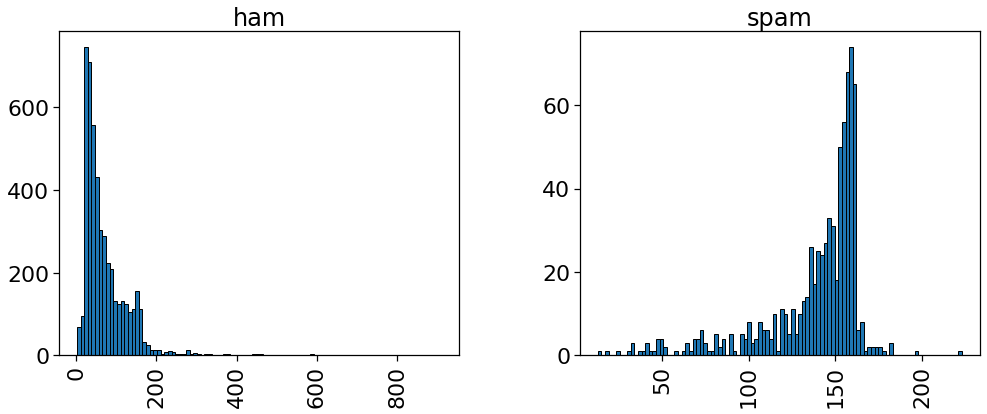

In [9]:
sns.set_context(context='notebook',font_scale=2)
Data.hist(column='Msg_Length',by='Category',bins=100,figsize=(16,6))


In [10]:
print('Average length of spam messages: ',Data[Data['Category']=='spam']['Msg_Length'].mean(),'characters')
print('Average length of ham messages: ',Data[Data['Category']=='ham']['Msg_Length'].mean(),'characters')



Average length of spam messages:  138.429718875502 characters
Average length of ham messages:  71.02134715025906 characters


In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Manoj
[nltk_data]     Shiwale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
corpus=[]
for i in range(0,5572):
    msg=re.sub('[^a-zA-Z]',' ',Data['Message'][i])
    msg=msg.lower()
    msg=msg.split()
    msg=[word for word in msg if not word in set(stopwords.words('english'))]
    msg=' '.join(msg)
    corpus.append(msg)

In [13]:
corpus[0:5]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think goes usf lives around though']

In [14]:
words=[]
for i in range(0,5572):
    msg=re.sub('[^a-zA-Z]',' ',Data['Message'][i])
    msg=msg.lower()
    msg=msg.split()
    msg=[word for word in msg if not word in set(stopwords.words('english'))]
    for word in msg:
        words.append(word)
df=pd.DataFrame(words,columns=['Words'])
df=df['Words'].value_counts().to_frame().reset_index()
df.head()

,index,Words
0,u,1212
1,call,606
2,get,397
3,ur,385
4,gt,318


In [15]:
print('Total words in whole dataset -',df.index.max())
df=df[df['Words']>5]
print('Total words with frequency greater than 5 in whole dataset -',df.index.max())

Total words in whole dataset - 7563
Total words with frequency greater than 5 in whole dataset - 1450


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=Data.iloc[:,0].values

In [17]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
X=np.concatenate((X,np.array(Data['Msg_Length']).reshape(5572,1)),axis=1)

In [19]:
X

array([[  0,   0,   0, ...,   0,   0, 111],
       [  0,   0,   0, ...,   0,   0,  29],
       [  0,   0,   0, ...,   0,   0, 155],
       ...,
       [  0,   0,   0, ...,   0,   0,  57],
       [  0,   0,   0, ...,   0,   0, 125],
       [  0,   0,   0, ...,   0,   0,  26]], dtype=int64)

In [20]:
X.shape

(5572, 1501)

In [21]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report


In [24]:
Pipelines=[]
Pipelines.append(('MultinomialNB',Pipeline([('mNB',MultinomialNB())])))

In [25]:
for name,model in Pipelines:
    model.fit(X_train,y_train)
    print('CM of '+name+':'+'\n',confusion_matrix(y_test,model.predict(X_test)),'\n')
    print('CR of '+name+':'+'\n',classification_report(y_test,model.predict(X_test)),'\n')


CM of MultinomialNB:
 [[958   7]
 [ 13 137]] 

CR of MultinomialNB:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.95      0.91      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115
 



In [26]:
Classifier=MultinomialNB()
Classifier.fit(X_train,y_train)
print('Confusion Matrix: \n', confusion_matrix(y_test,Classifier.predict(X_test)))
print('Classification Report: \n', classification_report(y_test,Classifier.predict(X_test)))



Confusion Matrix: 
 [[958   7]
 [ 13 137]]
Classification Report: 
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.95      0.91      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

